#### Resolucion DNS

Para crear el servidor primeramente usaremos DuckDNS. DuckDNS es un servicio gratuito que permite asignar un nombre de dominio a una dirección IP dinámica, facilitando el acceso remoto a dispositivos y servicios en redes domésticas. Nos logearemos en la cuenta y conseguiremos un dominio y un token  

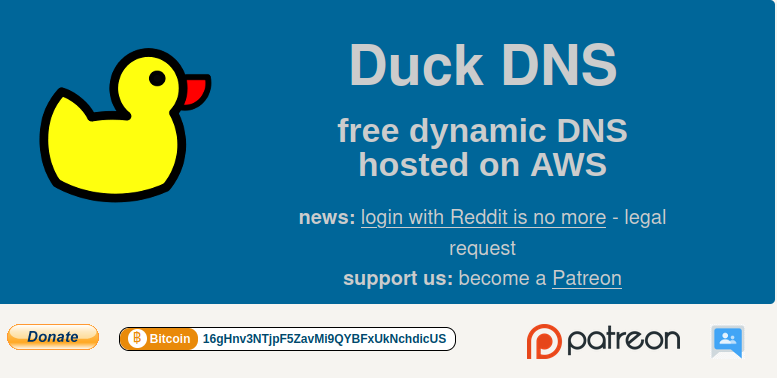

Una vez conseguido el dominio y la cuenta, procedemos a instalarlo donde actualizará la ip en el servidor cada 5 minutos:

En nuestro caso lo instalaremos en linux

Usaremos cron (para automatizar la actualización periódica de la dirección IP de DuckDNS) y curl (para descargar los logs). Asi que comprobamos que esten instalados

In [ ]:
ps -ef | grep cr[o]n

In [ ]:
curl --version

Ahora en la carpeta que queramos creamos un script donde enviaremos nuestro dominio y token y la ip

In [ ]:
mkdir duckdns
cd duckdns
nano duck.sh

y dentro pegamos las siguientes lineas

In [ ]:
echo url="https://www.duckdns.org/update?domains=exampledomain&token=a7c4d0ad-114e-40ef-ba1d-d217904a50f2&ip=" | curl -k -o ~/duckdns/duck.log -K -

donde cambiaremos: 
- domains= por el dominio
- token= por el token de usuario
- ip= la dejaremos en blanco para que duckdns pruebe una deteccion automatica

Guardamos y salimos (ctrl+o y ctrl+x)

hacemos el archivo ejecutable

In [ ]:
chmod 755 duck.sh

ahora entramos en crontab donde especificaremos que el script corra cada 5 minutos

In [ ]:
*/5 * * * * ~/duckdns/duck.sh >/dev/null 2>&1

Guardamos y salimos

Corremos el script y comprobamos que su log nos devuelva un OK

In [ ]:
./duck.sh
cat duck.log

#### Apertura de puertos publicos

Para abrir los puertos cada Switch o Router tiene un tutorial diferente, muchos de ellos se pueden encontrar en https://portforward.com/

#### Codigo del servidor Python

In [ ]:
from http.server import SimpleHTTPRequestHandler, HTTPServer

# Definir el directorio donde se encuentra el archivo index.html
# Asegúrate de que el archivo index.html esté en el mismo directorio que este script
# o proporciona la ruta completa al directorio donde se encuentra el archivo.
# Por ejemplo: '/ruta/completa/al/directorio'
DIRECTORY = ''

# Configurar la dirección IP y el puerto del servidor
HOST = '127.0.0.1'
PORT = 8000

class CustomHandler(SimpleHTTPRequestHandler):
    # Sobrescribir el método para servir archivos del directorio actual
    def translate_path(self, path):
        return SimpleHTTPRequestHandler.translate_path(self, path.lstrip('/'))

def run(server_class=HTTPServer, handler_class=CustomHandler):
    server_address = (HOST, PORT)
    httpd = server_class(server_address, handler_class)
    print(f'Servidor iniciado en http://{HOST}:{PORT}')
    httpd.serve_forever()

if __name__ == '__main__':
    run()